This notebook is used for generating different benchmark

In [1]:
from time import sleep

from payload import generate_spectrogram_protobuf
from utils import convert_bytes, create_payload_size_df, create_decoding_time_df
from plots import plot_payload_size, plot_decoding_time
from producer import produce

### Test Payload

In [2]:
payload, size = generate_spectrogram_protobuf(10)
print(payload, size)

b'\n1\n\x132022-02-15 16:34:32\x12\x0200\x1a\x02XX"\x12\x88\x01\xdd\x01\x9b\x02\x02\xae\x02\xc1\x01\xee\x01\x8d\x02\x1d\xa1\x02\n.\n\x132022-02-15 16:34:32\x12\x0200\x1a\x02XX"\x0fl\x12<\x8e\x02\xbe\x02\x80\x01~\xcb\x02\xcf\x02E\n-\n\x132022-02-15 16:34:32\x12\x0200\x1a\x02XX"\x0e25\xba\x01\xc5\x01D^\x9a\x02\xdb\x01DX\n0\n\x132022-02-15 16:34:32\x12\x0200\x1a\x02XX"\x11\xac\x01\x1a\xe3\x02\xb8\x02\xe9\x01i\xa8\x01\r\xb6\x02\xa4\x02' 229


### Plot Payload Size Statistics

In [3]:
channels = []
utf_size = []
pb_size = []
unit = "MB"

pb_payloads = []
utf_payloads = []

for channel in range(10000, 600000, 30000):
    channels.append(channel)

    payload, size = generate_spectrum_utf(channel)
    utf_size.append(convert_bytes(size, unit))
    utf_payloads.append(payload)

    payload, size = generate_spectrum_pb(channel)
    pb_size.append(convert_bytes(size, unit))
    pb_payloads.append(payload)

plot_payload_size(channels, utf_size, pb_size, unit)


NameError: name 'generate_spectrum_utf' is not defined

In [51]:
# test
print(len(channels))
print(len(utf_payloads))
print(channels[19])

20
20
580000


#### Browser Performance
- Start performance recording at browser inspector 
- Send Protobuf payloads to browser

In [5]:
for channel in range(25000, 100000, 25000):
    sleep(1)
    payload, _ = generate_spectrogram_protobuf(channel)
    await produce(payload, "spectrogram-protobuf")

Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f2402a51ca0>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f24841e3e50>
Task was destroyed but it is pending!
task: <Task pending name='Task-62' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f242f705af0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-73' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f246ee94be0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-83' coro=<Sender._sender_routine() ru

### Deserialisation Cost

In [63]:
for channel in range(len(channels)):
    for d in range(10):
        await produce(pb_payloads[d], "spectrum-pb")
        sleep(.25)
    
    sleep(10)

Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda75d788b0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=627, timestamp=1644701751179, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-5941' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda747f4940>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda747f47f0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=628, timestamp=1644701751458, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda747f47f0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=629, timestamp=1644701751802, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77cb2220>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=630, timestamp=1644701752195, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda747f47f0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=631, timestamp=1644701752661, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-5961' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7c943b80>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-5971' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda81057850>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-5981' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7495bd60>()]>

produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=632, timestamp=1644701753193, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77cb2220>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=633, timestamp=1644701753781, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-6001' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7495bdc0>()]> cb=[Sender._fail_all()]>


CancelledError: 

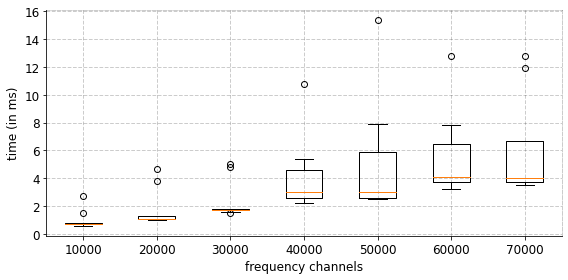

In [23]:

y = [
    [2.699999999254942, 1.5, 0.7000000011175871, 0.8000000007450581, 0.6000000014901161, 0.7999999988824129, 0.6999999992549419, 0.6999999992549419, 0.6999999992549419],
    [3.800000000745058, 4.699999999254942, 1.200000001117587, 1.299999998882413, 1.099999999627471, 1.099999999627471, 1.099999999627471, 1.099999999627471, 1],
    [4.800000000745058, 5, 1.700000001117587, 1.800000000745058, 1.6000000014901161, 1.700000001117587, 1.5, 1.699999999254942, 1.699999999254942],
    [10.800000000745058, 3, 5.400000000372529, 2.599999999627471, 3.300000000745058, 2.599999999627471, 4.600000001490116, 2.200000001117587, 2.900000000372529],
    [15.400000000372529, 7.900000000372529, 5.900000000372529, 2.5, 3.5, 2.599999999627471, 2.599999999627471, 2.899999998509884, 3],
    [12.799999998882413, 7.800000000745058, 6.5, 4.099999999627471, 3.199999999254942, 3.699999999254942, 3.5, 3.700000001117587, 4.400000000372529],
    [12.800000000745058, 11.900000000372529, 6.699999999254942, 3.699999999254942, 4, 3.599999999627471, 4.300000000745058, 3.5, 3.900000000372529]
]

channels = [10000, 20000, 30000, 40000, 50000, 60000, 70000]

plot_deserialisation_time(y, channels)

### Spectrogram

### Windmap

### Misc